# Introduction to the dataset

We are given a website containing all the countries in the world. Each country has the capital. population and Area in km per square. We are going to scrap the data on the website and convert it into a data frame. We then clean the data. 

# About the analysis
From the dataset we have scraped and cleaned. We are going to determine the countries with highest and lowest population. We are also going to determine the countries with the highest and lowest areas. We visualized each analysis. 
This analysis was carried out with python. We used some python packages like pandas, matplotlib and seaborn to analyze the dataset.  


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns

In [16]:
url = 'https://www.scrapethissite.com/pages/simple/'
result = requests.get(url)
src = result.content
soup = BeautifulSoup(src, 'html.parser')

In [17]:
all_countries = {'Country': [],
                'Capital' : [],
                'Population' : [],
                'Area (km2)' : []
                }

In [18]:
country = soup.find_all('h3', {'class' : 'country-name'})
for count in country:
    countrii = count.text.strip()
    all_countries['Country'].append(countrii)

capitals = soup.find_all('span', {'class' : 'country-capital'})
for cap in capitals:
    capitale = cap.text.strip()
    all_countries['Capital'].append(capitale)


populations = soup.find_all('span', {'class' : 'country-population'})
for pop in populations:
    popula = pop.text.strip()
    all_countries['Population'].append(popula)

area = soup.find_all('span', {'class' : 'country-area'})
for ar in area:
    are = ar.text.strip()
    all_countries['Area (km2)'].append(are)



In [19]:
df = pd.DataFrame(all_countries)
df

,Country,Capital,Population,Area (km2)
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0
...,...,...,...,...
245,Yemen,Sanaa,23495361,527970.0
246,Mayotte,Mamoudzou,159042,374.0
247,South Africa,Pretoria,49000000,1219912.0
248,Zambia,Lusaka,13460305,752614.0


In [20]:
df.head()

,Country,Capital,Population,Area (km2)
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


Let us convet Area km to float

In [21]:
df['Area (km2)'] =  df['Area (km2)'].astype('float')

Let us convert population to int

In [22]:
df['Population'] = df['Population'].astype('int')

Let us sub divide population into smaller groups using populated, underpopulated and over populated. 

In [23]:
Population_Status = []
for population in df['Population']:
    if population < 50000:
        Population_Status.append('Underpopulated')
    elif 50000 < population < 200000:
         Population_Status.append('Populated')
    else:
        Population_Status.append('Overpopulated')

df['Population_stats'] = pd.Series(Population_Status)
        

In [24]:
df.head()

,Country,Capital,Population,Area (km2),Population_stats
0,Andorra,Andorra la Vella,84000,468.0,Populated
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,Overpopulated
2,Afghanistan,Kabul,29121286,647500.0,Overpopulated
3,Antigua and Barbuda,St. John's,86754,443.0,Populated
4,Anguilla,The Valley,13254,102.0,Underpopulated


sub divide area km into no space, underspacious, spacious, over spacious and overly spacious

In [25]:
Area_Stats = []
for are in df['Area (km2)']:
    if are < 10000:
        Area_Stats.append('No Space')
    elif 10000 < are < 500000:
        Area_Stats.append('Under Spacious')
    elif 50000 < are < 1000000:
        Area_Stats.append('Spacious')
    elif 1000000 < are < 1000000000:
        Area_Stats.append('Over Spacious')
    else:
        Area_Stats.append('Overly Spacious')

df['Area_Stats'] = pd.Series(Area_Stats)
    

### Population Stats
- Underpopulated is for population less than 50,000
- Populated is for population more than 50,000 and less than 200,000
- Overpopulated is for population more than 200,000

### Area Stats
- No Space is for areas less than ten thousand. 
- Under Spacious is for areas more than ten thousand and less than five hundred thousand. 
- Spacious is for areas more than five hundred thousand and less than 1 million.
- Over Spacious is for areas more than 1 million and less than 1 bilion.
- Overly spacious is for ares more than 1 billon.

In [26]:
df.head(50)

,Country,Capital,Population,Area (km2),Population_stats,Area_Stats
0,Andorra,Andorra la Vella,84000,468.0,Populated,No Space
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,Overpopulated,Under Spacious
2,Afghanistan,Kabul,29121286,647500.0,Overpopulated,Spacious
3,Antigua and Barbuda,St. John's,86754,443.0,Populated,No Space
4,Anguilla,The Valley,13254,102.0,Underpopulated,No Space
5,Albania,Tirana,2986952,28748.0,Overpopulated,Under Spacious
6,Armenia,Yerevan,2968000,29800.0,Overpopulated,Under Spacious
7,Angola,Luanda,13068161,1246700.0,Overpopulated,Over Spacious
8,Antarctica,None,0,14000000.0,Underpopulated,Over Spacious
9,Argentina,Buenos Aires,41343201,2766890.0,Overpopulated,Over Spacious


let us a get a summary of the report 

In [27]:
df.describe()

,Population,Area (km2)
count,2.500000e+02,2.500000e+02
mean,2.744568e+07,5.996369e+05
std,1.168626e+08,1.911821e+06
min,0.000000e+00,0.000000e+00
25%,1.798562e+05,1.174750e+03
50%,4.288138e+06,6.489450e+04
75%,1.542062e+07,3.726315e+05
max,1.330044e+09,1.710000e+07


In [28]:
df.isna().sum()
#  there is no null value

Country             0
Capital             0
Population          0
Area (km2)          0
Population_stats    0
Area_Stats          0
dtype: int64

In [29]:
df.duplicated().sum()
# there is no duplicates

0

Text(0.5, 1.0, 'Population by Status')

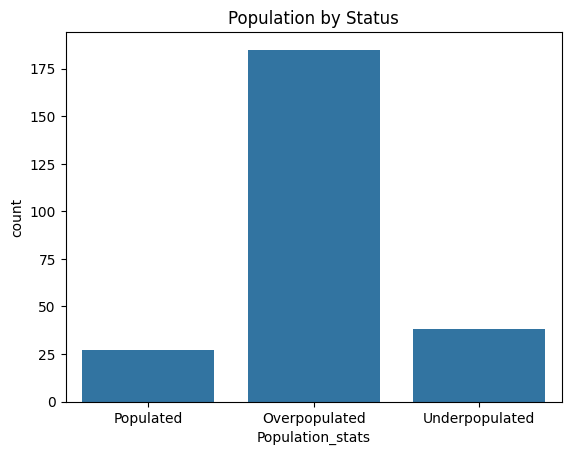

In [30]:

sns.countplot(data = df, x = 'Population_stats')
plt.title('Population by Status')

##### From the able we can see that majority of the countries are overpopulated. 

Text(0.5, 1.0, 'Area by status')

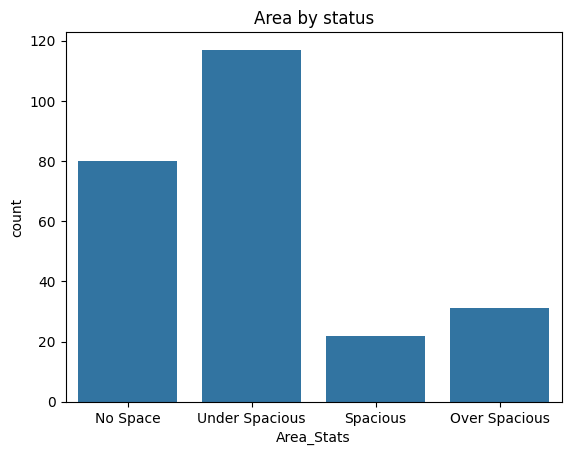

In [31]:
sns.countplot(data = df, x = 'Area_Stats')
plt.title('Area by status')

#### We can see that few countries are spacious and over spacious. The countries are either under spacious or they have no space

## Exercise one
Find the countries with the top 5 population and visualize it

In [32]:
sort_high_df_5 = df.sort_values(by = 'Population', ascending = False)

In [33]:
sort_high_df = sort_high_df_5.head(5)
sort_high_df

,Country,Capital,Population,Area (km2),Population_stats,Area_Stats
47,China,Beijing,1330044000,9596960.0,Overpopulated,Over Spacious
104,India,New Delhi,1173108018,3287590.0,Overpopulated,Over Spacious
232,United States,Washington,310232863,9629091.0,Overpopulated,Over Spacious
100,Indonesia,Jakarta,242968342,1919440.0,Overpopulated,Over Spacious
30,Brazil,Brasília,201103330,8511965.0,Overpopulated,Over Spacious


let us plot a graph to visualize the first 5 countries witht the highest population.

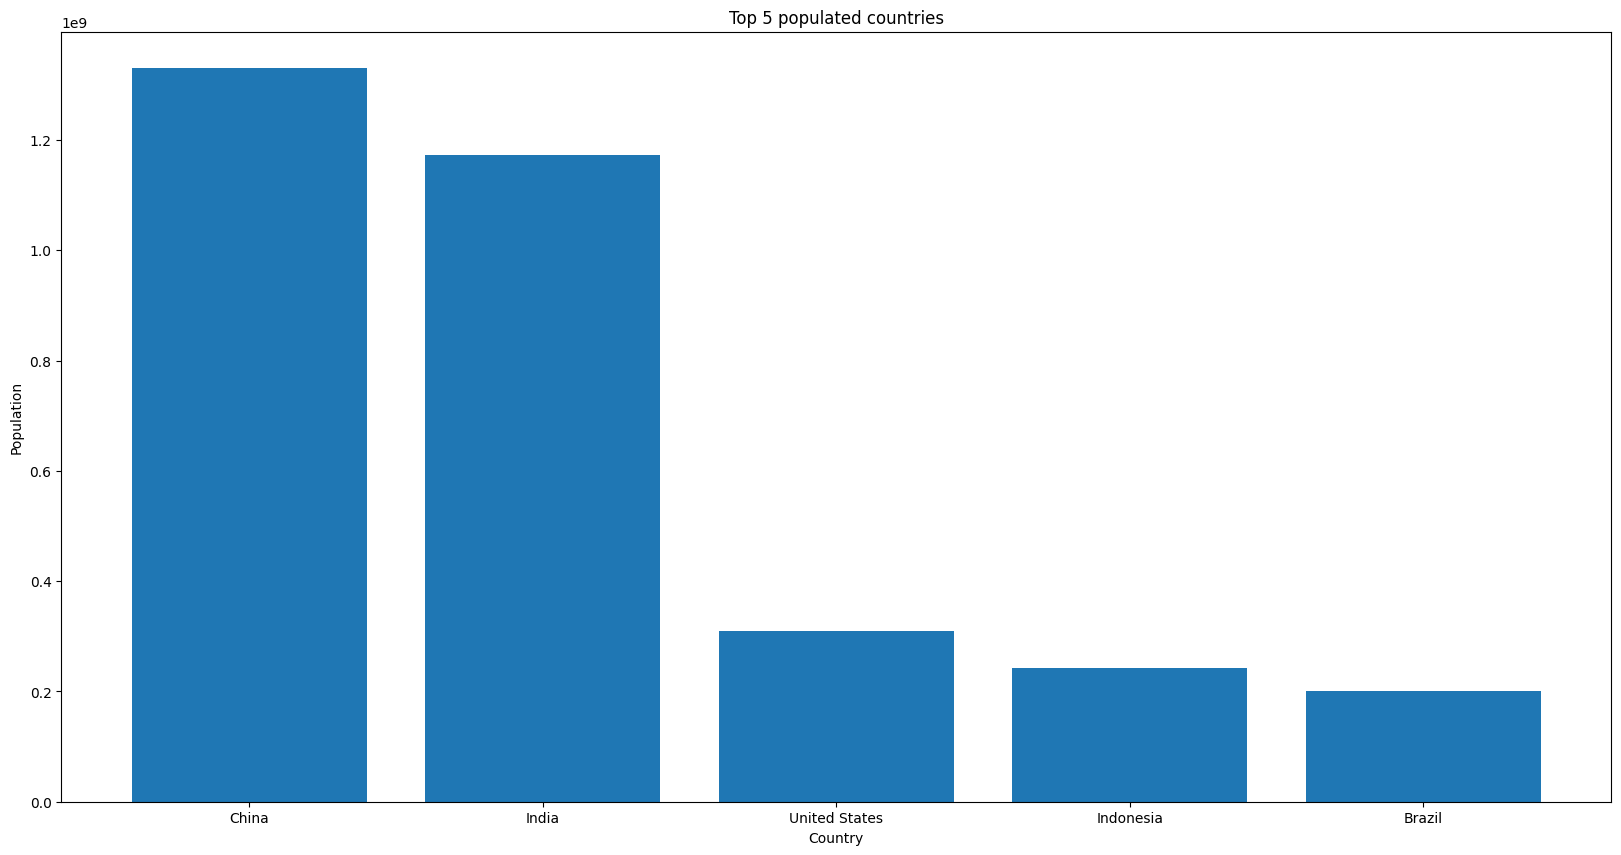

In [34]:
plt.figure(figsize=(20, 10))
plt.bar(sort_high_df['Country'], sort_high_df['Population'])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 5 populated countries')
plt.show()

### From the above we can see China is the most populated country. 
##### The graph above signifies the top 5 populated countries

## Exercise two
Find the countries with the least 7 population

In [35]:
sort_low_7 = df.sort_values(by = 'Population', ascending = True)

In [ ]:
U.S. Minor Outlying Islands, Antarctica, Bouvet Island, Heard Island and McDonald Islands 

In [49]:
sort_low_df = sort_low_7.head(7)
sort_low_df

,Country,Capital,Population,Area (km2),Population_stats,Area_Stats
231,U.S. Minor Outlying Islands,None,0,0.0,Underpopulated,No Space
8,Antarctica,None,0,14000000.0,Underpopulated,Over Spacious
33,Bouvet Island,None,0,49.0,Underpopulated,No Space
95,Heard Island and McDonald Islands,None,0,412.0,Underpopulated,No Space
89,South Georgia and the South Sandwich Islands,Grytviken,30,3903.0,Underpopulated,No Space
180,Pitcairn Islands,Adamstown,46,47.0,Underpopulated,No Space
215,French Southern Territories,Port-aux-Français,140,7829.0,Underpopulated,No Space


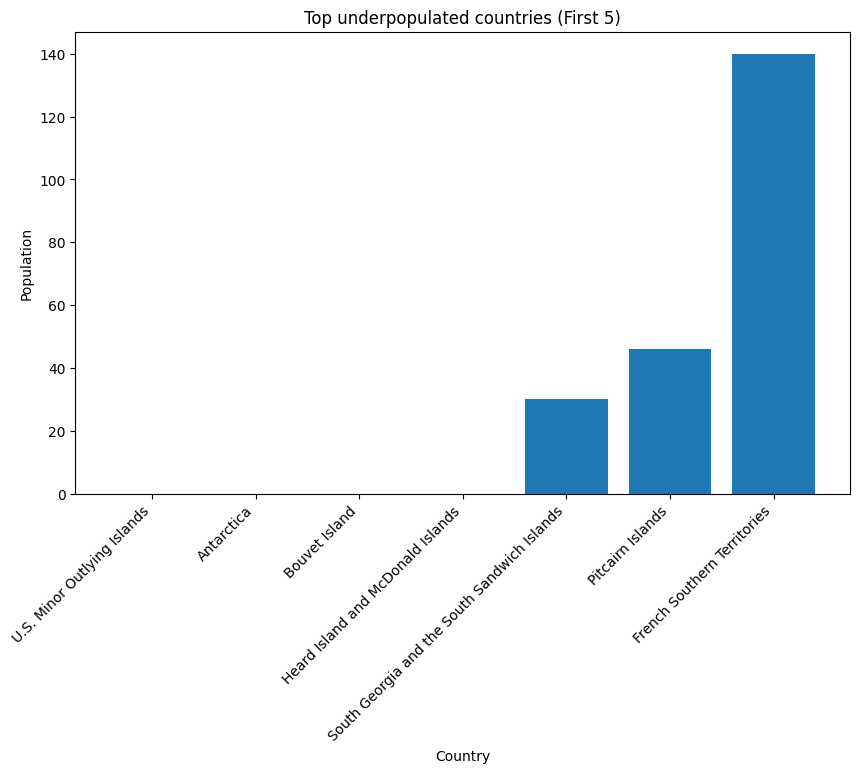

In [45]:
import matplotlib.pyplot as plt

# Assuming 'sort_low_df' is your DataFrame with 'Country' and 'Population' columns

plt.figure(figsize=(10, 6))
bars = plt.bar(sort_low_df['Country'], sort_low_df['Population'])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top underpopulated countries (First 5)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


#### From the above we can see first four countries have no population. no one lives in them 

## Exercise three
Find the countries with the highest area and visualize it on a graph

In [38]:
sortHigh_area_10 = df.sort_values(by = 'Area (km2)', ascending = False)

In [51]:
sortHigh_area_df = sortHigh_area_10.head(5)
sort_high_df

,Country,Capital,Population,Area (km2),Population_stats,Area_Stats
47,China,Beijing,1330044000,9596960.0,Overpopulated,Over Spacious
104,India,New Delhi,1173108018,3287590.0,Overpopulated,Over Spacious
232,United States,Washington,310232863,9629091.0,Overpopulated,Over Spacious
100,Indonesia,Jakarta,242968342,1919440.0,Overpopulated,Over Spacious
30,Brazil,Brasília,201103330,8511965.0,Overpopulated,Over Spacious


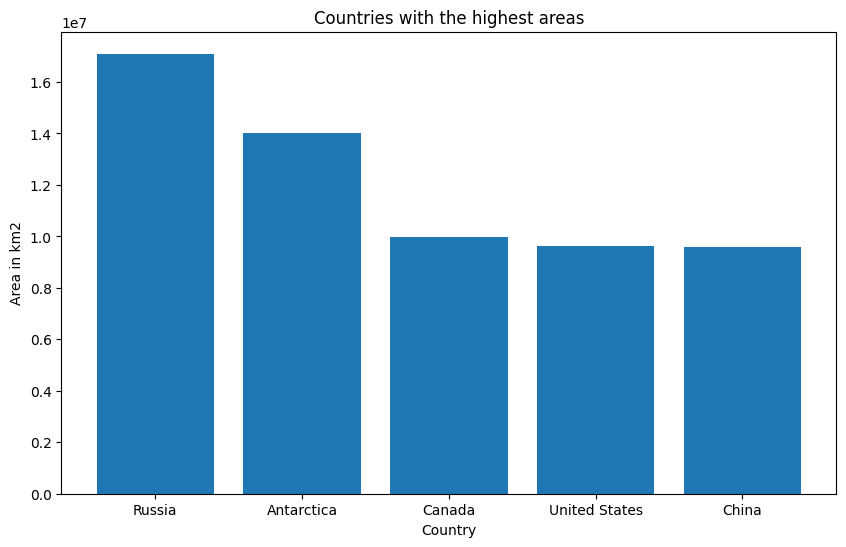

In [40]:
plt.figure(figsize=(10,6))
plt.bar(sortHigh_area_df['Country'], sortHigh_area_df['Area (km2)'])
plt.xlabel('Country')
plt.ylabel('Area in km2')
plt.title("Countries with the highest areas")
plt.show()

### From the above chart we can see countries that has highest area. Russia has the highest area in km2

# Exercise four
Find the countries with the least 5 areas and visualize it on a graph

In [41]:
sortlow_area = df.sort_values(by = 'Area (km2)', ascending = True)

In [52]:
sortlow_area_df = sortlow_area.head(5)
sortlow_area_df

,Country,Capital,Population,Area (km2),Population_stats,Area_Stats
231,U.S. Minor Outlying Islands,None,0,0.00,Underpopulated,No Space
235,Vatican City,Vatican City,921,0.44,Underpopulated,No Space
137,Monaco,Monaco,32965,1.95,Underpopulated,No Space
82,Gibraltar,Gibraltar,27884,6.50,Underpopulated,No Space
219,Tokelau,None,1466,10.00,Underpopulated,No Space


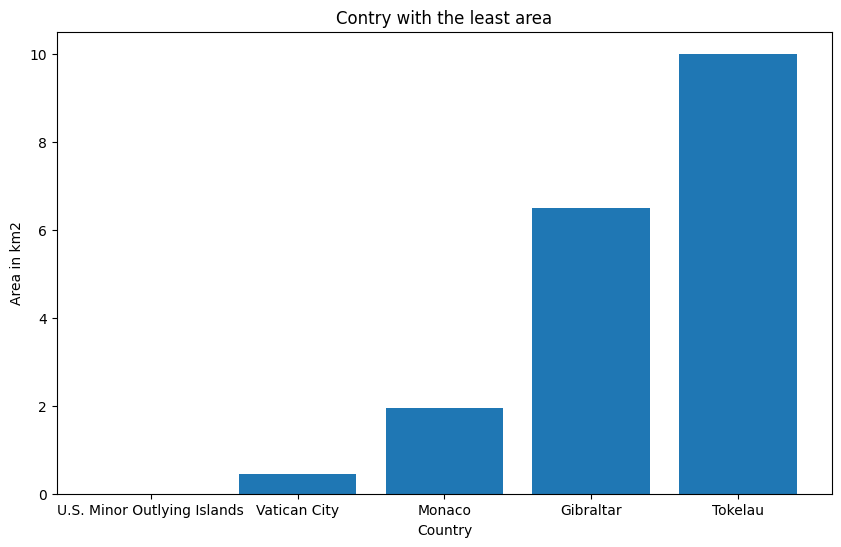

In [43]:
plt.figure(figsize =(10,6))
plt.bar(sortlow_area_df['Country'], sortlow_area_df['Area (km2)'])
plt.xlabel('Country')
plt.ylabel('Area in km2')
plt.title('Contry with the least area')
plt.show()

### From the chart above we can see the country with the least areas. 